In [1]:
import alpdesign
import numpy as np
import haiku as hk
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from functools import partial

[[11.23300196]
 [ 0.88052647]
 [ 9.56000167]
 [ 3.97494806]
 [ 0.1006316 ]
 [11.69842309]
 [ 4.88063243]
 [ 2.31452672]
 [10.71726503]
 [ 2.02521088]
 [ 8.93105419]
 [ 5.77373785]
 [ 8.729791  ]
 [ 7.69831713]
 [ 3.29568479]
 [ 6.45300113]
 [12.23931793]
 [ 0.15094739]
 [11.5726336 ]
 [ 0.80505277]
 [ 5.35863251]
 [ 0.45284218]
 [ 7.1574223 ]
 [ 2.52836886]
 [ 5.736001  ]
 [ 6.46558008]
 [11.84937049]
 [ 1.48431605]
 [ 6.80521171]
 [ 8.16373827]
 [ 3.89947436]
 [11.4216862 ]]


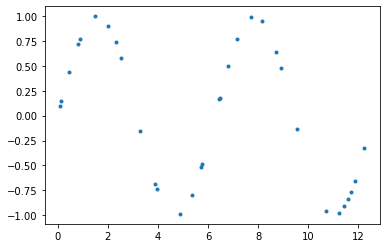

In [2]:
N = 32
x = np.linspace(0,4 * np.pi, 1000)
reps = x[np.random.randint(0,1000, size=N)].reshape(-1, 1)
labels = np.sin(reps)
plt.plot(reps, labels, '.')
print(reps)

In [3]:
key = jax.random.PRNGKey(0)
config = alpdesign.EnsembleBlockConfig()
forward_fxn, full_forward_fxn = alpdesign.build_model(config)
full_forward_t = hk.without_apply_rng(hk.transform(full_forward_fxn))
params = full_forward_t.init(key, jnp.tile(reps[0], (5,1)))
full_forward_t.apply(params, jnp.tile(reps[0], (5,1)))

DeviceArray([[-0.5045083 , -2.9271774 ],
             [-4.749528  , -1.0491371 ],
             [ 0.89704376, -1.1741096 ],
             [-0.31864792,  0.3204695 ],
             [-0.20467207,  1.1213111 ]], dtype=float32)

In [4]:
params, losses = alpdesign.ensemble_train(
    key, full_forward_t, config, reps, labels, epochs=500)

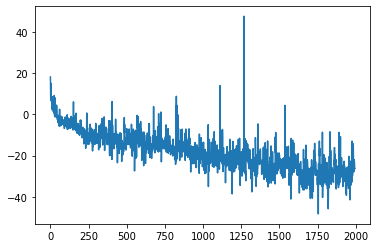

In [5]:
plt.plot(losses[5:])

In [6]:
forward_t = hk.without_apply_rng(hk.transform(forward_fxn))
forward = partial(forward_t.apply, params)
yhat_mu, yhat_std = [], []
for xi in x:
    v = forward(xi[np.newaxis])
    yhat_mu.append(float(v[0]))
    yhat_std.append(float(v[1]))

(-1.0, 1.0)

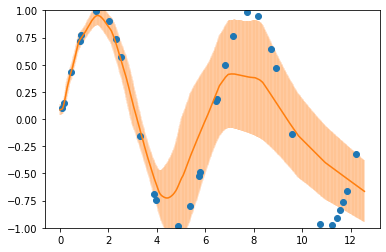

In [7]:
plt.plot(np.squeeze(reps), np.squeeze(labels), 'o')
plt.plot(x, yhat_mu, color='C1')
plt.errorbar(x, yhat_mu, yerr=yhat_std, color='C1', alpha=0.1)
plt.ylim(-1,1)